<a href="https://colab.research.google.com/github/KaiwenYangUT/lab-1-git-and-java-2022f/blob/master/JSC270_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']
income94.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [25]:
# check the columns of the data.
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [26]:
# How are missing values represented in this data? 
# line 14 has a " ?"

# Cast missing values to np.nan, if necessary. 
income94 = income94.replace(" ?", np.nan)

# Count the number of missing values in each column. 
missing_value_count = income94.isna().sum()
print(missing_value_count)


age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64


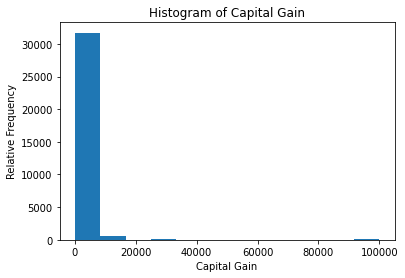

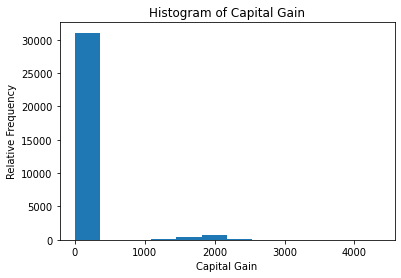

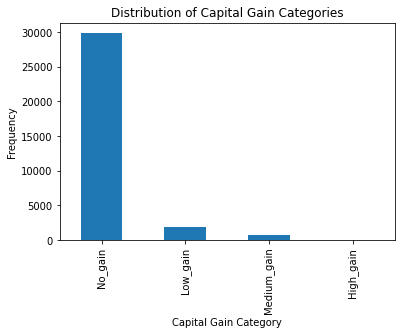

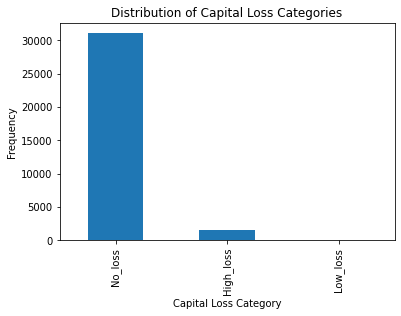

In [34]:
# Individually plot the distributions of capital_gain and capital_loss. 
plt.hist(income94.capital_gain, bins = 12)
plt.title('Histogram of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Relative Frequency')
plt.show()

plt.hist(income94.capital_loss, bins = 12)
plt.title('Histogram of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Relative Frequency')
plt.show()
# Do you think these variables should be transformed to categorical variables? Why or why not?
# I think no, because transforming those numerical variables to categorical variable will lose the exact magnitude of the individual's gain or loss. 
# Leaving the two variable numerical will allow us to have more accurate measures and modelling, such as the average income/loss, standard deviation, and mean income/loss.
# While it is reasonable to create a new categorical variable to store the categorize the data since lots of the columns are storing the value 0. 

# If yes, create a new variable(s) with your suggested transformation and plot or describe in a table the distribution of the new categorical variable(s).
# Eventhough I do not suggest transform it directly, I think it is good to create new variables.
income94['capital_gain_category'] = pd.cut(income94['capital_gain'], bins=[-1, 0, 9999, 99999, float('inf')], 
                                     labels=['No_gain', 'Low_gain', 'Medium_gain', 'High_gain'])

category_counts = income94['capital_gain_category'].value_counts()
category_counts.plot(kind='bar')
plt.title('Distribution of Capital Gain Categories')
plt.xlabel('Capital Gain Category')
plt.ylabel('Frequency')
plt.show()

income94['capital_loss_category'] = pd.cut(income94['capital_loss'], bins=[-1, 0, 999, float('inf')], 
                                     labels=['No_loss', 'Low_loss', 'High_loss'])
category_counts = income94['capital_loss_category'].value_counts()
category_counts.plot(kind='bar')
plt.title('Distribution of Capital Loss Categories')
plt.xlabel('Capital Loss Category')
plt.ylabel('Frequency')
plt.show()